In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Circle
import numpy as np
import os

In [2]:
plt.style.use('dark_background')

In [3]:
mammo = pd.read_table('scan_file_data.txt', delimiter='\s', engine='python')

In [4]:
mammo.columns = mammo.columns.str.lower()

In [81]:
mammo.refnum.value_counts()

mdb226    3
mdb132    2
mdb249    2
mdb223    2
mdb005    2
         ..
mdb177    1
mdb299    1
mdb083    1
mdb118    1
mdb181    1
Name: refnum, Length: 322, dtype: int64

The original scan_file data.txt has duplicate refnums. Need to fix it to match the image filenames

In [50]:
# recreate ref_nums based on file names
ref_nums = create_img_dic('./all-mias/')
len(ref_nums)

322

In [53]:
mammo.refnum[120:140]

120    mdb120
121    mdb121
122    mdb122
123    mdb123
124    mdb124
125    mdb125
126    mdb126
127    mdb127
128    mdb128
129    mdb129
130    mdb130
131    mdb131
132    mdb132
133    mdb132
134    mdb133
135    mdb134
136    mdb135
137    mdb136
138    mdb137
139    mdb138
Name: refnum, dtype: object

In [7]:
mammo.severity.value_counts(normalize=True)

B    0.560976
M    0.439024
Name: severity, dtype: float64

In [8]:
mammo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   refnum    330 non-null    object 
 1   bg        330 non-null    object 
 2   class     330 non-null    object 
 3   severity  123 non-null    object 
 4   x         122 non-null    object 
 5   y         122 non-null    object 
 6   radius    119 non-null    float64
dtypes: float64(1), object(6)
memory usage: 18.2+ KB


252 788 52.0
335 766 18.0


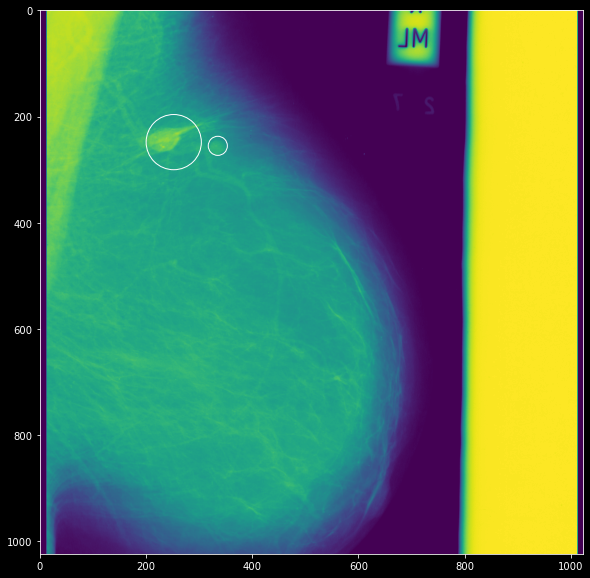

In [79]:
img = mpimg.imread('./all-mias/mdb132.pgm')

# Create a figure. Equal aspect so circles look circular
fig, ax = plt.subplots(1)

fig.set_size_inches(12, 10)
ax.set_aspect('equal')

# Show the image
ax.imshow(img)



# create a circle to patch on the image
x = pd.to_numeric(mammo.iloc[132].x)
y = pd.to_numeric(mammo.iloc[132].y)
r = pd.to_numeric(mammo.iloc[132].radius)
circ = Circle((x,248), r, fill=False)
ax.add_patch(circ)
print(x, y, r)

x1 = pd.to_numeric(mammo.iloc[133].x)
y1 = pd.to_numeric(mammo.iloc[133].y)
r1 = pd.to_numeric(mammo.iloc[133].radius)
circ1 = Circle((x1,255), r1, fill=False)
ax.add_patch(circ1)
print(x1, y1, r1)
# Show the image
plt.show()

477 133 30.0
500 168 26.0


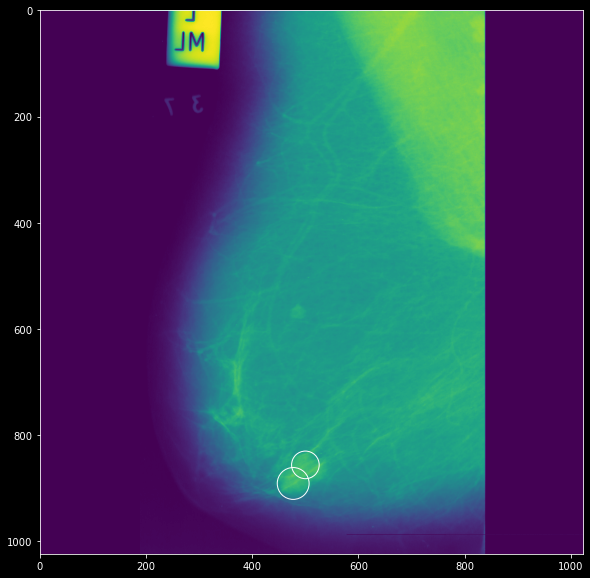

In [89]:
img = mpimg.imread('./all-mias/mdb005.pgm')

# Create a figure. Equal aspect so circles look circular
fig, ax = plt.subplots(1)

fig.set_size_inches(12, 10)
ax.set_aspect('equal')

# Show the image
ax.imshow(img)

# create a circle to patch on the image
x = pd.to_numeric(mammo.iloc[4].x)
y = pd.to_numeric(mammo.iloc[4].y)
r = pd.to_numeric(mammo.iloc[4].radius)
circ = Circle((x,1024-y), r, fill=False)
ax.add_patch(circ)
print(x, y, r)
# Show the image
x1 = pd.to_numeric(mammo.iloc[5].x)
y1 = pd.to_numeric(mammo.iloc[5].y)
r1 = pd.to_numeric(mammo.iloc[5].radius)
circ1 = Circle((x1,1024-y1), r1, fill=False)
ax.add_patch(circ1)
print(x1, y1, r1)

plt.show()

In [11]:
from pathlib import Path
import re

INITIALLY REMOVE ONLY THE SCANS WITHOUT INVALID X ENTRY *NOTE

In [12]:
test_df = mammo.copy()

In [13]:
test_df.set_index(keys='refnum', drop=True, inplace=True)

In [14]:
# search for invalid x values for removal
indices = test_df.x[lambda x: x == '*NOTE'].index

for idx in indices:
    idx = test_df.index.get_loc(idx)
    test_df.drop(test_df.index[idx], inplace=True)

In [15]:
# make x and y float values
test_df.x = test_df.x.astype(float)
test_df.y = test_df.y.astype(float)

In [16]:
# save clean to file
test_df.to_csv('test_df.csv')

In [91]:
if test_df.groupby(level=0).filter(lambda x: len(x) > 1)

,bg,class,severity,x,y,radius
refnum,,,,,,
mdb005,F,CIRC,B,477.0,133.0,30.0
mdb005,F,CIRC,B,500.0,168.0,26.0
mdb132,F,CIRC,B,252.0,788.0,52.0
mdb132,F,CIRC,B,335.0,766.0,18.0
mdb144,F,MISC,B,233.0,994.0,29.0
mdb144,F,MISC,M,313.0,540.0,27.0
mdb223,D,CALC,B,523.0,482.0,29.0
mdb223,D,CALC,B,591.0,529.0,6.0
mdb226,D,CALC,B,287.0,610.0,7.0


In [17]:
def create_img_dic(path: str) -> dict:
    '''Creates a dictionary with image filenames'''
    paths = Path(path).glob('**/*.pgm')
    img_dic = dict()
    for f_path in sorted(paths):
        # get full filename
        full_fname = f_path.name
        # get filename (no extension)
        filename = f_path.stem
        # create dictionary
        img_dic[filename] = f_path.as_posix()
    
    return img_dic

In [18]:
def get_img_data(filename: str) -> pd.Series:
    try:
        img_data = test_df.loc[filename]
        #print(img_data)
        return img_data
    except KeyError as ie:
        print('Invalid Index')

In [19]:
scan_info = get_img_data('mdb009').copy() # need to ensure we get a deep copy of the Series to avoid changing a value in it and keeping the reference
scan_info

bg             F
class       NORM
severity    None
x            NaN
y            NaN
radius       NaN
Name: mdb009, dtype: object

In [20]:
from PIL import Image

In [21]:
test_img = Image.open('./all-mias/mdb009.pgm')

In [22]:
def save_subsamples():
    pass

In [44]:
class MammoScan:
    def __init__(self, scan, sc_info):
        self.scan = scan
        self.sc_info = sc_info

    @property
    def get_x(self):
        return float(self.sc_info.x)
    
    @property
    def get_y(self):
        return float(self.sc_info.y)
        
    @property
    def get_radius(self):
        return float(self.sc_info.radius)
    
    @property
    def get_scan(self):
        return self.scan

    @property
    def get_class(self):
        return self.sc_info['class']

    @property
    def transformations(self):
        return self.__transform

    # private method
    def _set_x(self, xValue):
        self.sc_info.loc['x'] = xValue
    
    # private method
    def _set_y(self, yValue):
        self.sc_info.y = yValue
    
    # private method
    def _set_radius(self, rValue):
        self.sc_info.radius = rValue
        
    # private method
    def __get_crop_coords(self):
        '''Returns a tuple with x, y and r'''
        # check scan class to decide on how to crop
        if self.get_class == 'NORM':
            # generate random x and y
            x = float(np.random.randint(500, 513))
            y = float(np.random.randint(500, 513))
            self._set_x(x)
            self._set_y(y)
            self._set_radius(48.0)
        
        return (self.get_x, self.get_y, self.get_radius)
    
    # private method
    def __transform(self):
        '''Creates a dict 
                  with rotated and mirrored versions of self.scan'''
        # create dictionary
        transformations = dict()
        # get crop values
        x, y, r = self.__get_crop_coords()
        # crop and resize scan
        cropped_scan = self.get_scan.crop((x-r, y-r, x+r, y+r))
        resized_scan = cropped_scan.resize((48,48))
        # create rotated images
        for angle in [0, 90, 180, 270]:
            rotated = resized_scan.rotate(angle) # rotated by angle
            mirr_lr = rotated.transpose(Image.FLIP_LEFT_RIGHT)
            mirr_tp = rotated.transpose(Image.FLIP_TOP_BOTTOM)
            transformations[angle] = dict(zip(['rotated', 'mirr_lr', 'mirr_tp'], 
                                         [rotated, mirr_lr, mirr_tp]))

        return transformations

In [24]:
test = MammoScan(test_img, scan_info)

In [46]:
test_df.index.value_counts()

mdb226    3
mdb132    2
mdb249    2
mdb223    2
mdb005    2
         ..
mdb299    1
mdb083    1
mdb118    1
mdb218    1
mdb181    1
Name: refnum, Length: 319, dtype: int64

In [26]:
transformed = test.transformations()
transformed

HELLLO WORLD


{0: {'rotated': <PIL.Image.Image image mode=L size=48x48 at 0x7F8E98CDFAF0>,
  'mirr_lr': <PIL.Image.Image image mode=L size=48x48 at 0x7F8E99890F10>,
  'mirr_tp': <PIL.Image.Image image mode=L size=48x48 at 0x7F8E998903A0>},
 90: {'rotated': <PIL.Image.Image image mode=L size=48x48 at 0x7F8E997AA430>,
  'mirr_lr': <PIL.Image.Image image mode=L size=48x48 at 0x7F8E9878FD30>,
  'mirr_tp': <PIL.Image.Image image mode=L size=48x48 at 0x7F8E997AA4C0>},
 180: {'rotated': <PIL.Image.Image image mode=L size=48x48 at 0x7F8E997AA610>,
  'mirr_lr': <PIL.Image.Image image mode=L size=48x48 at 0x7F8E997AAA30>,
  'mirr_tp': <PIL.Image.Image image mode=L size=48x48 at 0x7F8E997AA5B0>},
 270: {'rotated': <PIL.Image.Image image mode=L size=48x48 at 0x7F8E9743B850>,
  'mirr_lr': <PIL.Image.Image image mode=L size=48x48 at 0x7F8E9743B1C0>,
  'mirr_tp': <PIL.Image.Image image mode=L size=48x48 at 0x7F8E9743B640>}}

In [ ]:
for angle, imgs in transformed.items():
    for img in imgs.values():
        print(angle)
        display(img)
        
        
# 90 degrees left-right == 270 degree top-bottom
# 0 degrees left-right == 180 top-bottom

In [28]:
scans_dic = create_img_dic('./all-mias/')

In [39]:
def save_subsamples(scans_dic: dict(), df: pd.DataFrame):
    # define subsamples folder
    folder = 'subsamples'
    # create if not yet
    if not os.path.exists(folder):
        os.mkdir(folder)
    
    # remove df duplicate indexes 
    
    
    
    # iterate dictionary of filenames
    for scan_name, filename in scans_dic.items():
        # create image and scan info objects
        scan = Image.open(filename)
        scan_info = df.loc[scan_name].copy()
        # create the MammoScan object
        m_scan = MammoScan(scan, scan_info)
        # get the transformations
        transf_scans = m_scan.transformations()
        # create filenames
        filenames = create_filename(scan_name, transf_scans)
        # get transformed scans Image objects
        imgs = get_transformed_scans(transf_scans)
        # prepare for saving
        fs_and_is = list(zip(filenames, imgs))
        for filename, image in fs_and_is:
            print(scan_name)
            image.save(filename)
        

In [31]:
def write_to_df(m_scan: MammoScan, df: pd.DataFrame):
    pass

In [41]:
def create_filename(scan_name: str, transf_dic: dict) -> list:
    '''Creates suffix pattern filename for transformed scans'''
    filename = ''
    file_names = list()
    for angle, transfs in transf_dic.items():
        for tf in transfs.keys():
            filename += f'{scan_name}_{angle}_{tf}.pgm'
            #print(filename)
            file_names.append(filename)
            filename = ''
     
    return file_names
    
        

In [ ]:
filenames = create_filename('mdb001', transformed)

In [ ]:
transformed = test.transformations()
transformed

In [35]:
def get_transformed_scans(transf_dic: dict):
    scans = list()
    for angle, transfs in transf_dic.items():
        for scan in transfs.values():
            scans.append(scan)
    
    return scans
        

In [ ]:
images = get_transformed_scans(transformed)
images

In [ ]:
list(zip(filenames, images))

In [43]:
save_subsamples(scans_dic, test_df)

HELLLO WORLD
HELLLO WORLD


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
def generate_index():
    indices = []
    for i in range(1, 323):
        indices.append('mdb)